# Model `BinaryMFThreshold` with sigmoid link function

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : [0.5 0.1 0.5 0.1]
[I] seed         : 1000
[I] noise        : [0.6 0.1]
[I] seed         : 2000
[I] Using RandomState.


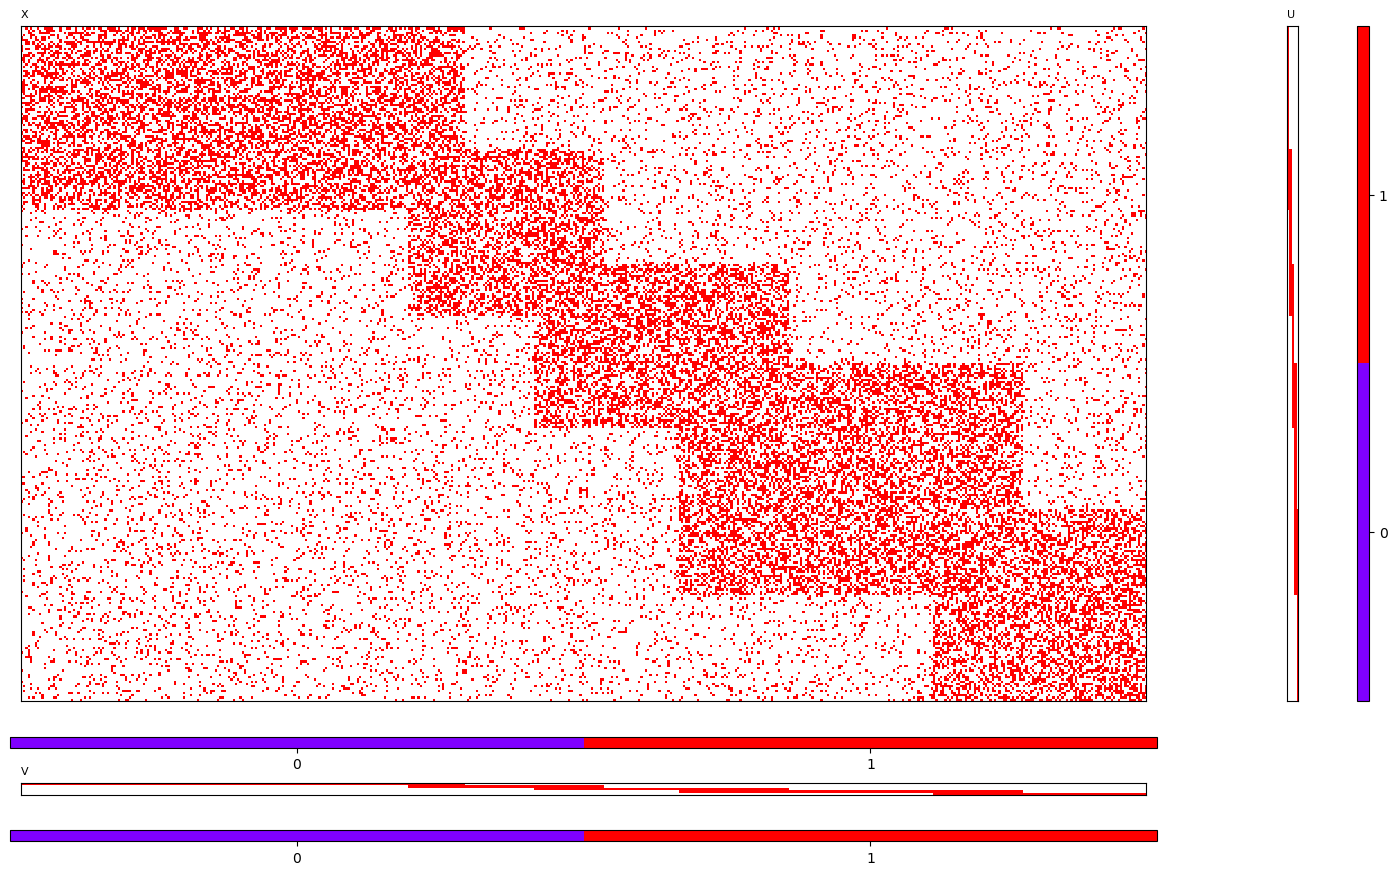

In [2]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.5, 0.1, 0.5, 0.1])
data.generate(seed=1000)

data.add_noise(noise=[0.6, 0.1], seed=2000)
data.show_matrix()

In [3]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [4]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 23218
[I]   val_size     : 3317
[I]   test_size    : 6634
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 116831
[I]   n_negatives  : 33169
[I]   train_size   : 23218
[I]   val_size     : 3317
[I]   test_size    : 6634
[I]   seed         : 2023


# Init with `NMFSklearn`

The thresholding gap can be relatively wide if you init with `NMFSklearn` followed by `BinaryMFPenalty`, as the factors are already (near) binary.

[I] k            : 5
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : cd
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] Missing validation data.
[W] Missing testing data.


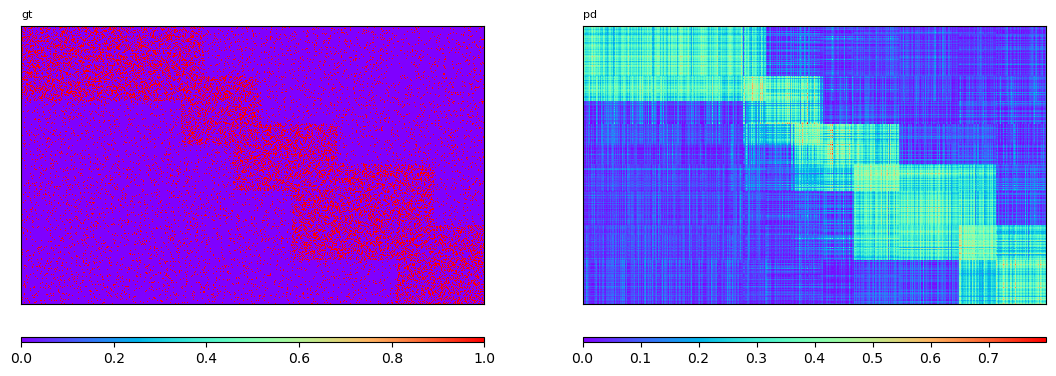

[I] model saved as: 24-05-19_14-36-13_NMFSklearn.pickle


In [5]:
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

k = 5
reg = 1
reg_growth = 3

from models import NMFSklearn, BinaryMFPenalty

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train)

U, V = model_nmf.U, model_nmf.V

In [6]:
# model_bmf = BinaryMFPenalty(k=k, U=U, V=V, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=100, seed=2024)
# model_bmf.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)

# U, V = model_bmf.U, model_bmf.V

# Reconstruction task

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : mask
[I] u            : 0.1
[I] v            : 0.1
[I] link_lamda   : 10
[I] lamda        : 100
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] init_method  : custom
[I] seed         : 1716100574
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.127191675868347] -> [0.0, 1.0], V: [0.0, 0.9106026422045581] -> [0.0, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [2326.487, 2969.486]
[I] iter: 2, start: [0.384, 0.462], direction: [-139.293, -529.142]
[I] iter: 3, start: [0.316, 0.204], direction: [-73.712, 460.418]
[I] iter: 4, start: [0.298, 0.317], direction: [-85.257, 20.707]
[I] iter: 5, start: [0.293, 0.318], direction: [6.000, 0.890]
[W] Stopped in advance: Difference lower than threshold


train  \
                                                                   0   
                time iter         u         v            F    Recall   
0  19/05/24 02:36:14    0  0.100000  0.100000  9285.933874  0.939271   
1  19/05/24 02:36:14    1  0.383995  0.462486  6864.195062  0.597726   
2  19/05/24 02:36:14    2  0.315981  0.204116  6468.216990  0.727840   
3  19/05/24 02:36:15    3  0.297985  0.316523  6409.725578  0.691576   
4  19/05/24 02:36:15    4  0.292781  0.317787  6407.354828  0.691274   
5  19/05/24 02:36:15    5  0.293147  0.317841  6407.347799  0.690973   

                                      val                                \
                                        0                                 
  Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0  0.185066  0.350393  0.309208  0.892071  0.025111  0.231747  0.048846   
1  0.333750  0.753040  0.428333  0.545071  0.043480  0.724780  0.080536   
2  0.297507  0.691853  0.422369  0.692493  0.040439  0.629833  0.076415   
3  0.320781  0.725600  0.438273  0.661743  0.043851  0.673447  0.082251   
4  0.320820  0.725693  0.438249  0.663250  0.043975  0.673700  0.082482   
5  0.321065  0.726000  0.438417  0.663250  0.044028  0.674100  0.082575   

       test                                
          0                                
     Recall Precision  Accuracy        F1  
0  0.899608  0.050645  0.249753  0.095892  
1  0.566325  0.090352  0.728653  0.155840  
2  0.706663  0.082532  0.639600  0.147803  
3  0.680133  0.090139  0.682227  0.159182  
4  0.680736  0.090269  0.682467  0.159401  
5  0.680585  0.090358  0.682853  0.159535

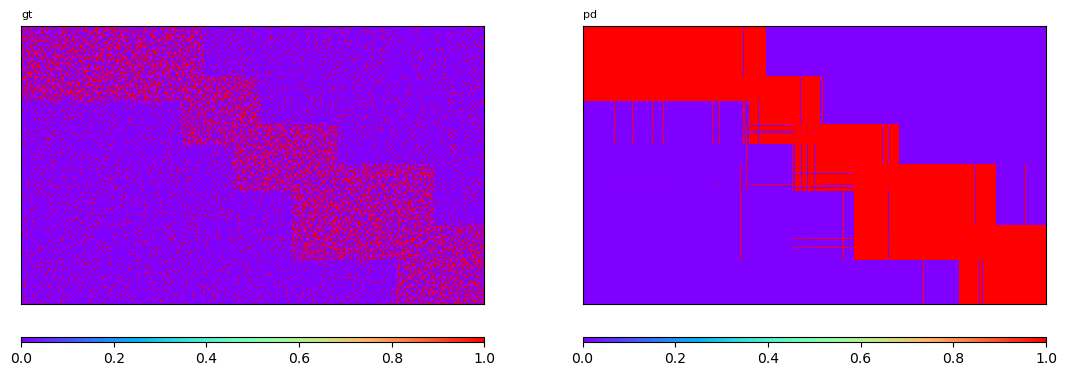

[I] model saved as: 24-05-19_14-36-16_BinaryMFThresholdExSigmoid.pickle


In [7]:
from models import BinaryMFThresholdExSigmoid

k = 5
u, v = 0.1, 0.1
# W = 'full'
W = 'mask'
init_method = 'custom'

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

model = BinaryMFThresholdExSigmoid(k=k, U=U, V=V, W=W, u=u, v=v, init_method=init_method)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='reconstruction', verbose=False, display=False)

# Visualize F

In [15]:
# from mpl_toolkits import mplot3d
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# from tqdm import tqdm

# N = 50
# dpi = 100

In [16]:
# x = np.linspace(0, 1.2, N)
# y = np.linspace(0, 1.2, N)
# Z = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         Z[i, j] = model.F([X[i, j], Y[i, j]])
        
# # fig = plt.figure(dpi=dpi)
# # ax = plt.axes(projection='3d')
# # ax.contour3D(X, Y, Z, 50, cmap='hot')
# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # ax.set_zlabel('z')

# levels = np.logspace(0, 10, num=50, endpoint=True, base=10)
# levels = (levels - levels.min()) / (levels.max() - levels.min())
# levels = levels * (Z.max() - Z.min()) + Z.min()

# plt.figure(dpi=dpi)
# cp = plt.contour(X, Y, Z, levels=levels)
# plt.clabel(cp, inline=1, fontsize=10)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

# Visualize dF

In [17]:
# x = np.linspace(0.0, 1.2, N)
# y = np.linspace(0.0, 1.2, N)
# dx = np.zeros([N, N])
# dy = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         dx[i, j], dy[i, j] = model.dF([X[i, j], Y[i, j]])

#         # re-scale
#         k = 6 / np.sqrt(dx[i, j]**2 + dy[i, j]**2)
#         dx[i, j] *= k
#         dy[i, j] *= k

# plt.figure(dpi=dpi) 
# fig = plt.quiver(X, Y, dx, dy)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()